# Beginner:world-happiness-report-2019 analysis
## 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

['world-happiness-report-2019.csv']


In [2]:
df = pd.read_csv('../input/world-happiness-report-2019.csv')

In [3]:
df = df.rename(columns = {'Country (region)':'Country','SD of Ladder':'SD',
                         'Positive affect':'Positive','Negative affect':'Negative','Social support':'Social',
                         })

In [4]:
df.head()

,Country,Ladder,SD,Positive,Negative,Social,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country                    156 non-null object
Ladder                     156 non-null int64
SD                         156 non-null int64
Positive                   155 non-null float64
Negative                   155 non-null float64
Social                     155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [6]:
df.isnull().sum()

Country                     0
Ladder                      0
SD                          0
Positive                    1
Negative                    1
Social                      1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [7]:
df = df.fillna(method = 'ffill')

In [8]:
df.describe()

,Ladder,SD,Positive,Negative,Social,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,78.500000,77.814103,78.025641,77.897436,77.935897,75.891026,78.025641,76.506410,75.083333
std,45.177428,45.177428,44.803918,44.744861,44.762049,44.750877,42.661998,44.744861,43.849669,43.319661
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.750000,39.750000,39.750000,39.750000,39.750000,39.750000,38.750000,37.750000
50%,78.500000,78.500000,77.500000,78.500000,77.500000,77.500000,76.500000,78.500000,76.500000,75.500000
75%,117.250000,117.250000,116.250000,116.250000,116.250000,116.250000,113.250000,116.250000,114.250000,112.250000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


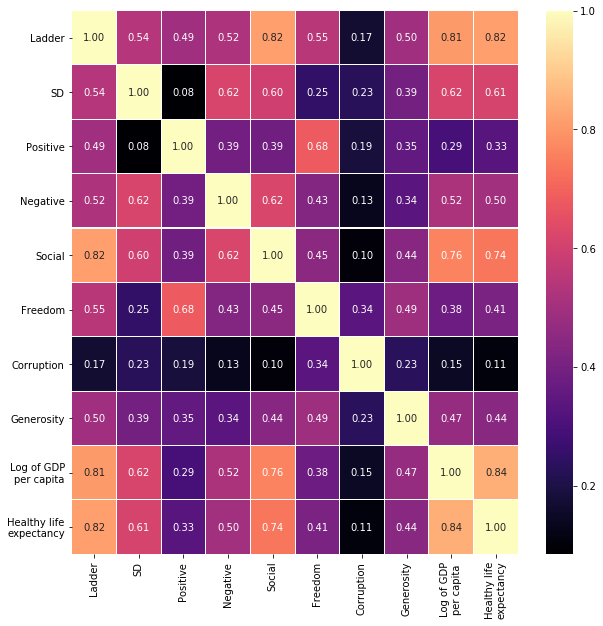

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=0.05,fmt='.2f',cmap='magma')
plt.show()

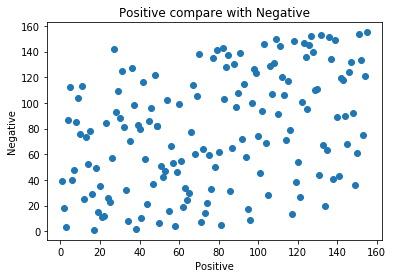

In [10]:
plt.scatter(df['Positive'],df.Negative)
plt.title('Positive compare with Negative')
plt.xlabel('Positive')
plt.ylabel('Negative')
plt.show()

Text(0.5, 1.0, 'Positive')

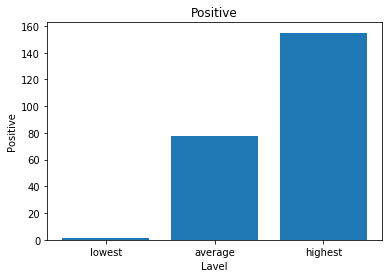

In [11]:
y = np.array([df['Positive'].min(),df['Positive'].mean(),df['Positive'].max()])
x = ['lowest','average','highest']
plt.bar(x,y)
plt.xlabel('Lavel')
plt.ylabel('Positive')
plt.title('Positive')

Using 'Positive' compare with every positive thing

Text(0.5, 1.0, 'Positive compare with Negative')

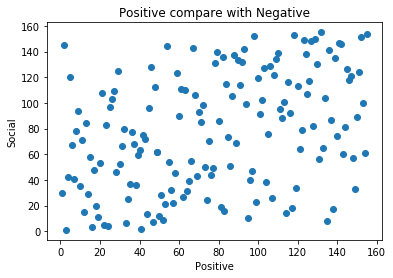

In [12]:
plt.scatter(df['Positive'],df.Social)
plt.xlabel('Positive')
plt.ylabel('Social')
plt.title('Positive compare with Negative')

Text(0.5, 1.0, 'Positive compare with Freedom')

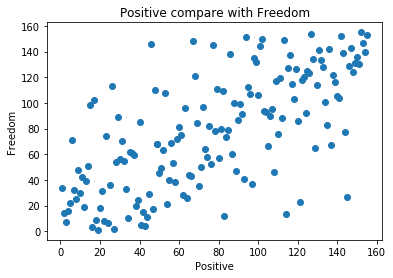

In [13]:
plt.scatter(df['Positive'],df.Freedom)
plt.xlabel('Positive')
plt.ylabel('Freedom')
plt.title('Positive compare with Freedom')

Text(0.5, 1.0, 'Positive compare with Generosity')

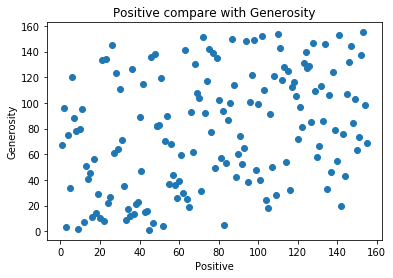

In [14]:
plt.scatter(df['Positive'],df.Generosity)
plt.xlabel('Positive')
plt.ylabel('Generosity')
plt.title('Positive compare with Generosity')

Using 'Negative' compare with every Negative thing

Text(0.5, 1.0, 'Negative compare with Corruption')

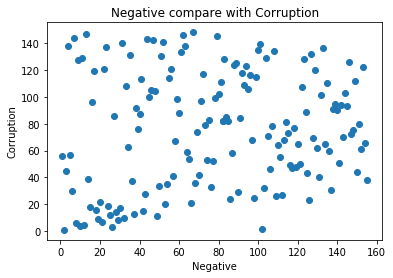

In [15]:
plt.scatter(df['Negative'],df.Corruption)
plt.xlabel('Negative')
plt.ylabel('Corruption')
plt.title('Negative compare with Corruption')

Text(0, 0.5, 'SD')

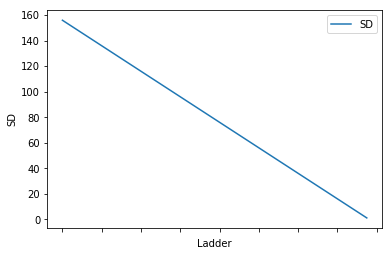

In [16]:
df.sort_values(by = ['SD'],ascending=False).plot(x='Country',y='SD')
plt.xlabel('Ladder')
plt.ylabel('SD')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


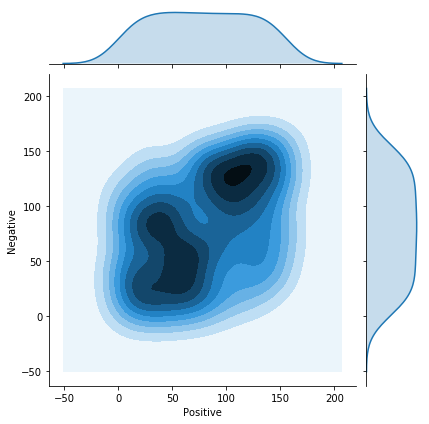

In [19]:
sns.jointplot('Positive','Negative',data=df,kind='kde')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [27]:
x = df.drop(['SD','Country'],axis=1)
y = df['SD']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

r2 score: 0.7839583862998768


Text(0.5, 1.0, 'LinearRegression')

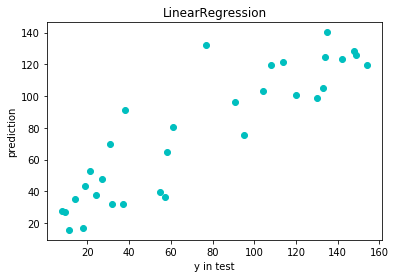

In [28]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predict_lr = lr.predict(x_test)
print('r2 score:' , r2_score(y_test,predict_lr))
plt.scatter(y_test,predict_lr,color='c')
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('LinearRegression')

r2 score: 0.7203134174191497


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'RandomForestRegressor')

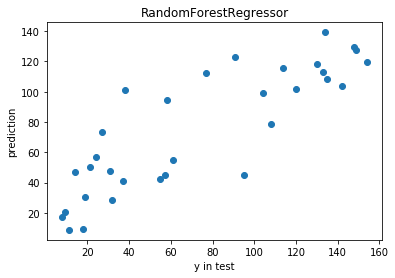

In [29]:
rfg = RandomForestRegressor()
rfg.fit(x_train,y_train)
predict_rfg = rfg.predict(x_test)
print('r2 score:' , r2_score(y_test,predict_rfg))
plt.scatter(y_test,predict_rfg)
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('RandomForestRegressor')

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predict_dtr = dtr.predict(x_test)
print('r2 score:' , r2_score(y_test,predict_dtr))
plt.scatter(y_test,predict_dtr)
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('DecisionTreeRegressor')

In [ ]:
y = np.array([r2_score(y_test,predict_lr),r2_score(y_test,predict_rfg),r2_score(y_test,predict_dtr)])
x = ['Linear','RandomForest','DecisionTree']

plt.bar(x,y)
plt.title('comparision')
plt.xlabel('Regressor')
plt.ylabel('r2_score')